In [122]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [123]:
df=pd.read_csv('data.csv')

In [124]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [125]:
df.shape

(569, 33)

In [127]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA(Exploratory Data Analysis)

In [130]:
#Checking for the null values.

df.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [131]:
#Also lets try to remove/drop the id feature as it is not significant in our prediction & also Unnamed: 32.

df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [132]:
df.shape

(569, 31)

In [133]:
#Lets now look for the numerical features
num_features =[feature for feature in df.columns if df[feature].dtypes!='O']

print("There are total {} numerical Variable".format(len(num_features)))

There are total 30 numerical Variable


In [134]:
#Lets check for the Category variable
cat_features =[feature for feature in df.columns if df[feature].dtypes=='O']

print("There are total {} categorical Variable".format(len(cat_features)))


There are total 1 categorical Variable


In [135]:
#Lets now check for the unique values.

for col in num_features:
    print("The variable {} has total {} unique values".format(col,df[col].nunique()))

The variable radius_mean has total 456 unique values
The variable texture_mean has total 479 unique values
The variable perimeter_mean has total 522 unique values
The variable area_mean has total 539 unique values
The variable smoothness_mean has total 474 unique values
The variable compactness_mean has total 537 unique values
The variable concavity_mean has total 537 unique values
The variable concave points_mean has total 542 unique values
The variable symmetry_mean has total 432 unique values
The variable fractal_dimension_mean has total 499 unique values
The variable radius_se has total 540 unique values
The variable texture_se has total 519 unique values
The variable perimeter_se has total 533 unique values
The variable area_se has total 528 unique values
The variable smoothness_se has total 547 unique values
The variable compactness_se has total 541 unique values
The variable concavity_se has total 533 unique values
The variable concave points_se has total 507 unique values
The v

In [136]:
for col in cat_features:
    print("The variable {} has {} unique values".format(col,df[col].nunique()))

The variable diagnosis has 2 unique values


In [137]:
#Lets check the value_counts() of our Target Variable

df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [138]:
#This look balanced dataset.

In [139]:
#Lets make the diagnosis values as 0 means benign and 1 means Malignant.

def diagnosis(value):
    if value=='M':
        return 1
    else:
        return 0

In [140]:
df['diagnosis']=df['diagnosis'].apply(diagnosis)

In [141]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Lets now look for the distribution of our dataset.

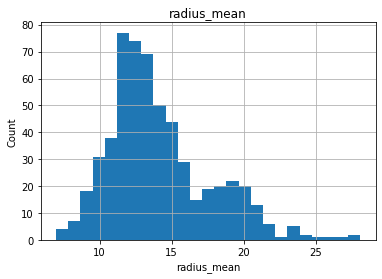

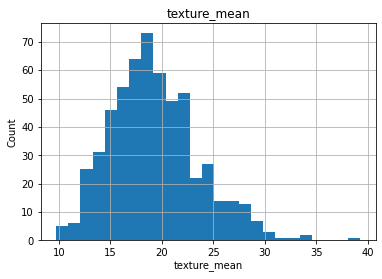

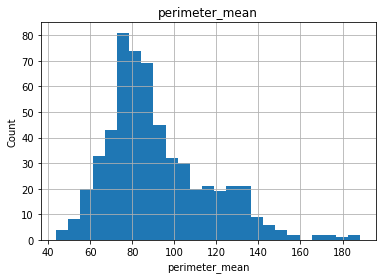

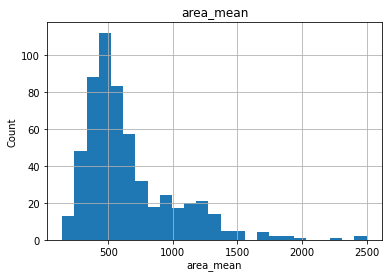

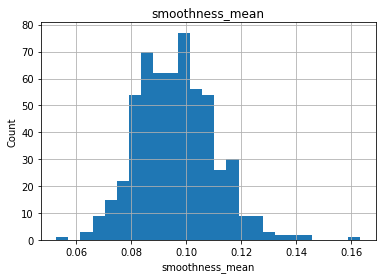

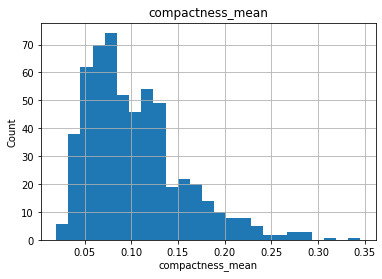

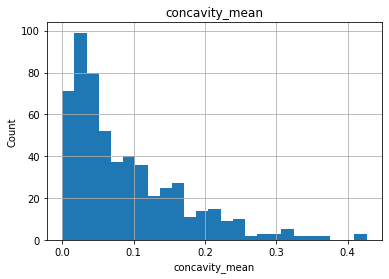

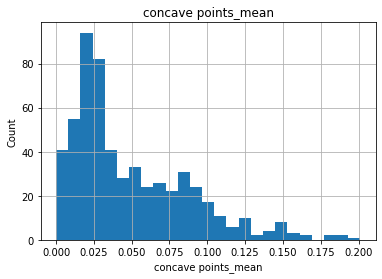

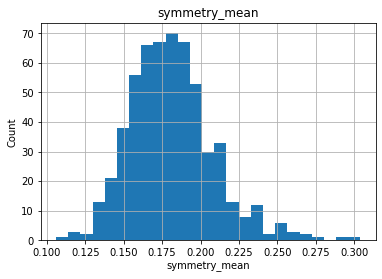

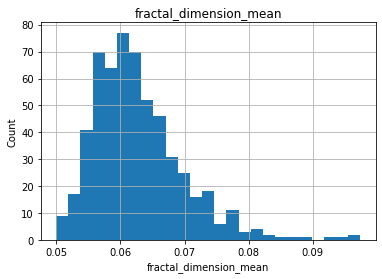

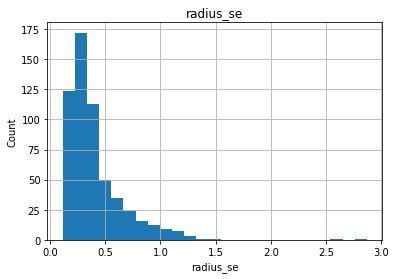

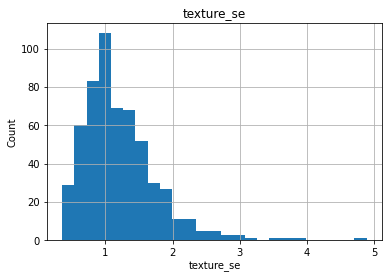

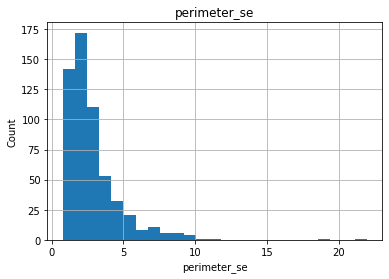

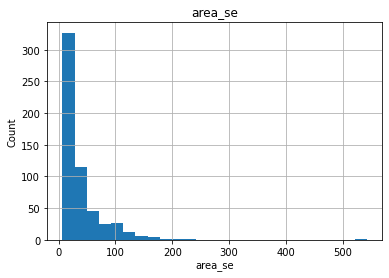

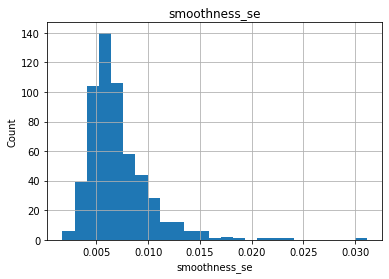

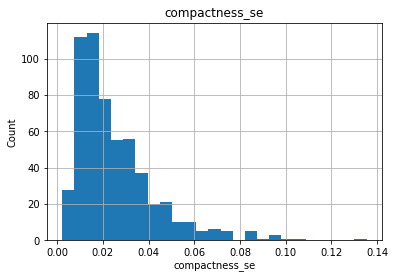

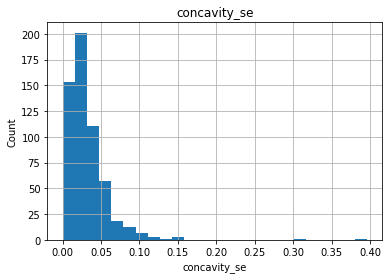

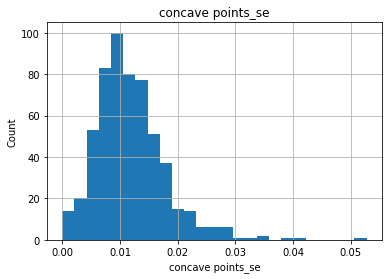

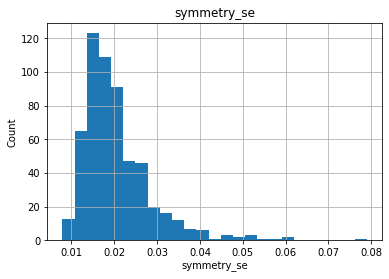

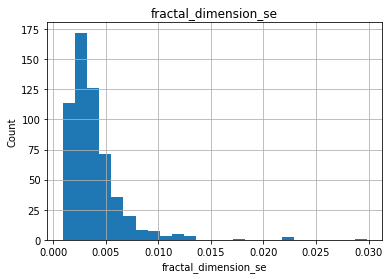

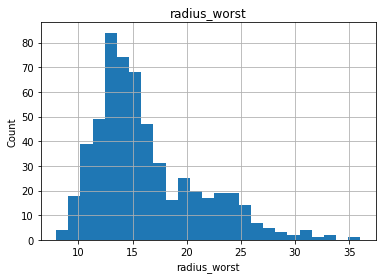

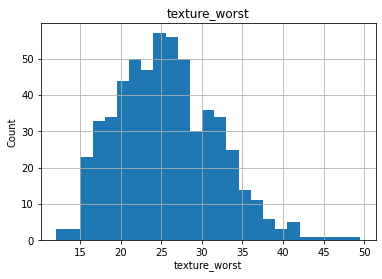

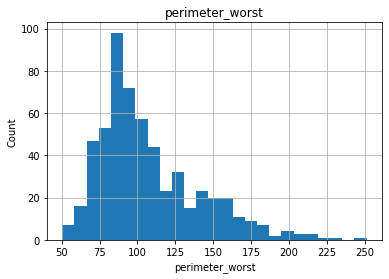

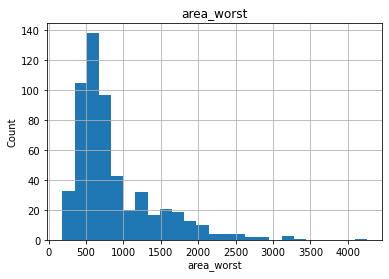

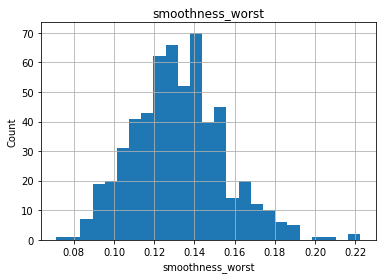

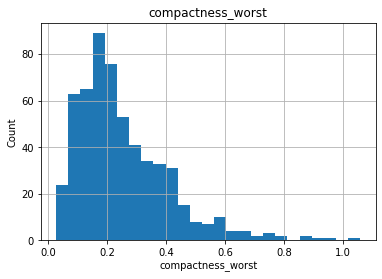

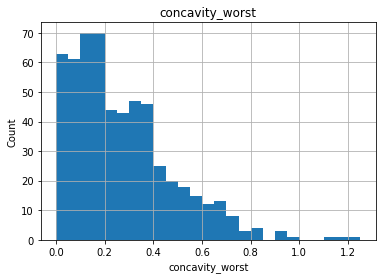

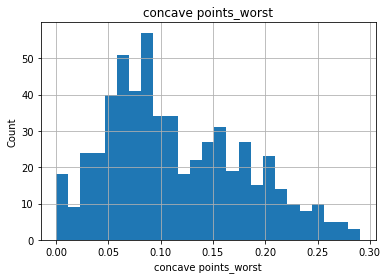

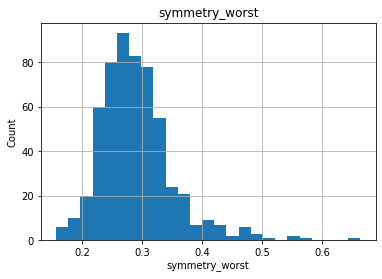

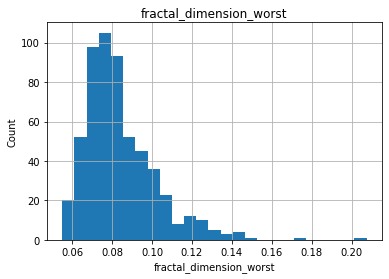

In [142]:
for col in num_features:
    data=df.copy() 
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

##### Some of the features are not normally distributed & skewed.

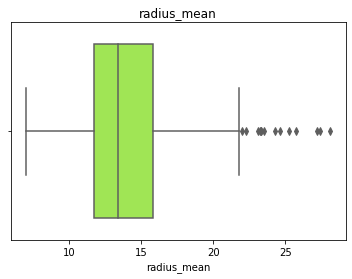

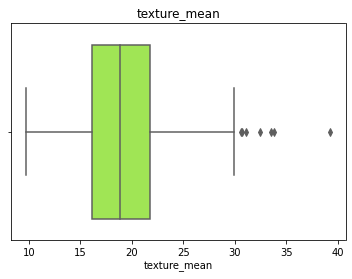

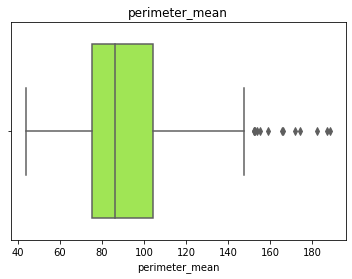

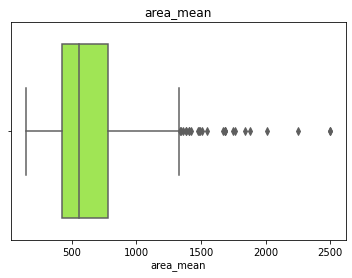

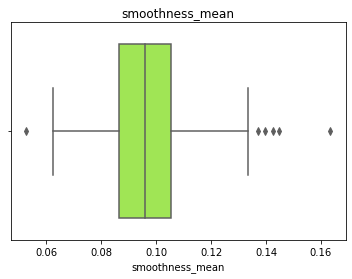

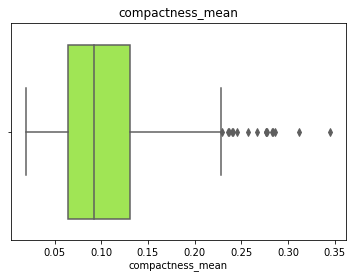

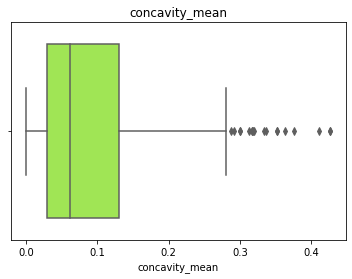

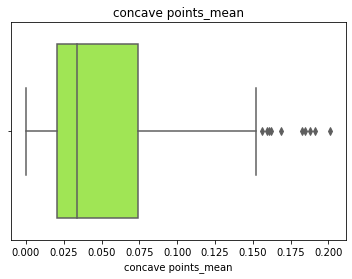

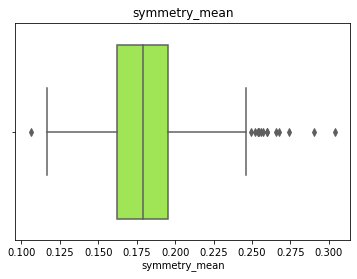

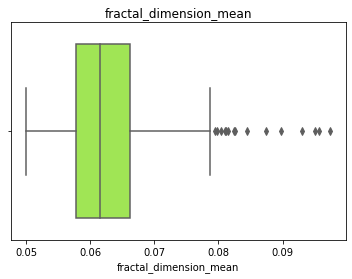

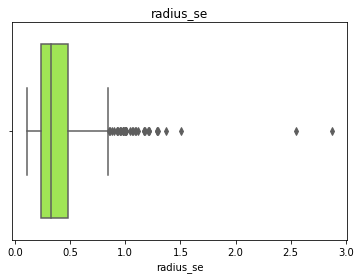

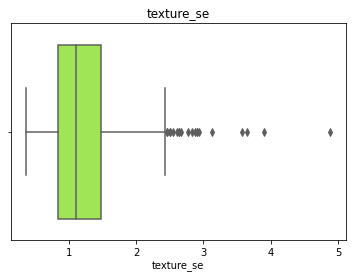

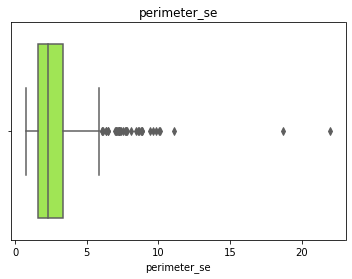

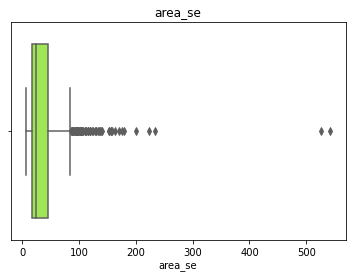

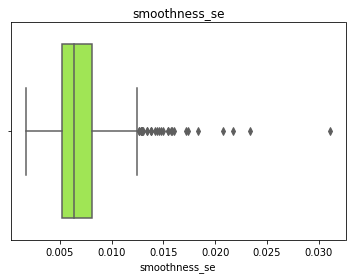

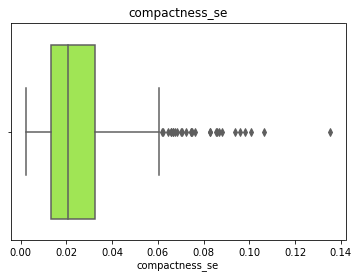

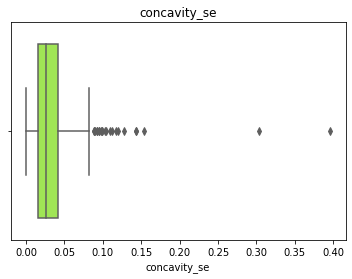

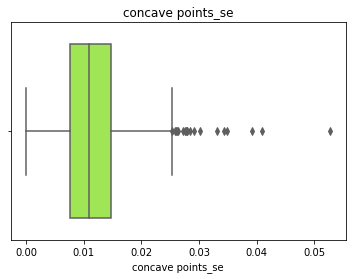

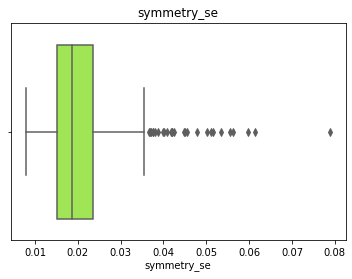

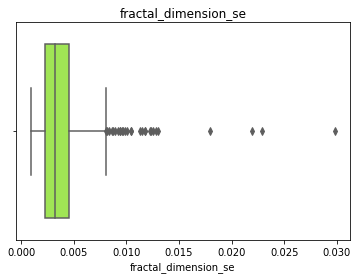

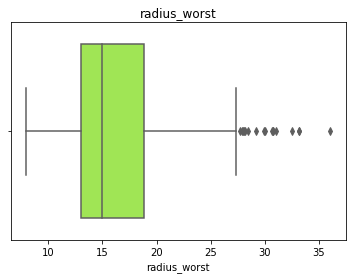

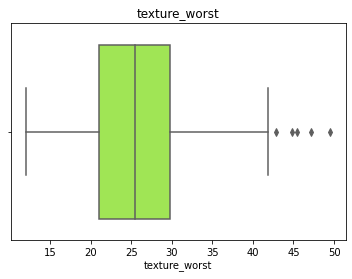

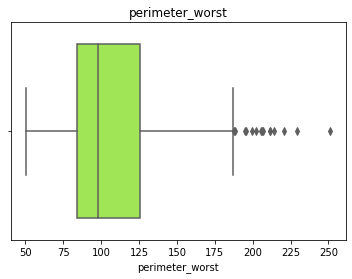

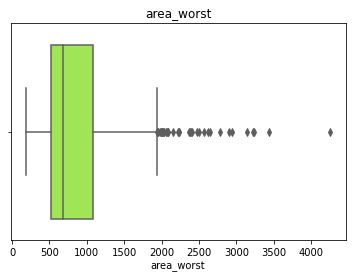

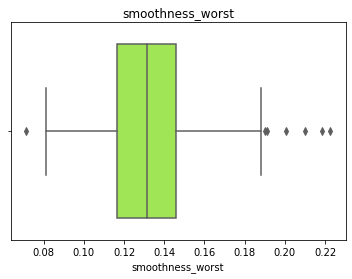

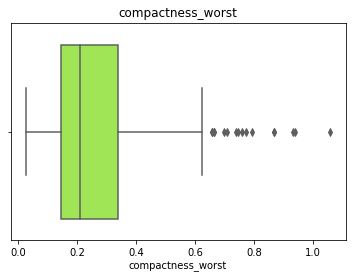

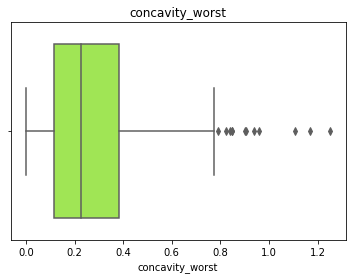

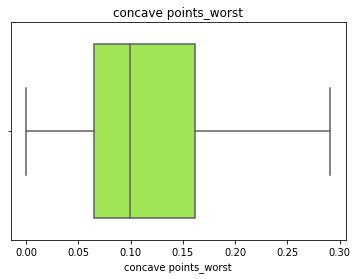

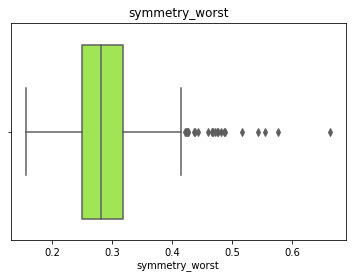

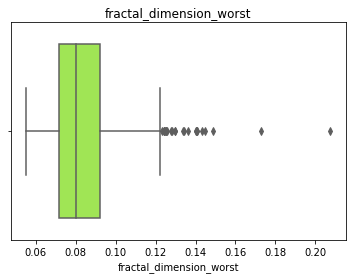

In [143]:
#Boxplot to see the outliers.

for col in num_features:
    data=df.copy()
    sns.boxplot(df[col],palette='turbo_r')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

## FEATURE ENGINEERING.

In [144]:
#There are outliers present in our dataset so willl remove it.

def remove_outliers(columns):
    for col in columns: 
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_bridge=df[col].quantile(0.25)-(IQR*1.5)
        upper_bridge=df[col].quantile(0.75)+(IQR*1.5)
    
        df.loc[df[col]>=upper_bridge,col]=upper_bridge
        df.loc[df[col]<=lower_bridge,col]=lower_bridge
    
        
   

In [145]:
remove_outliers(df[num_features])

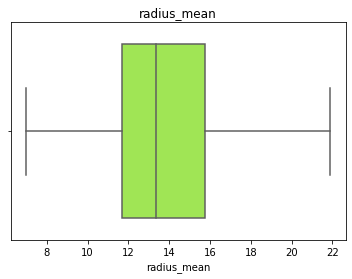

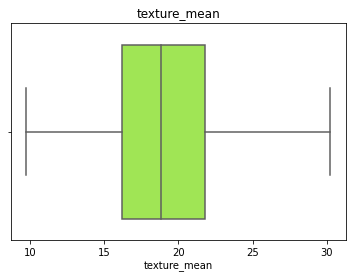

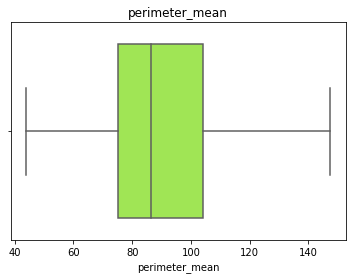

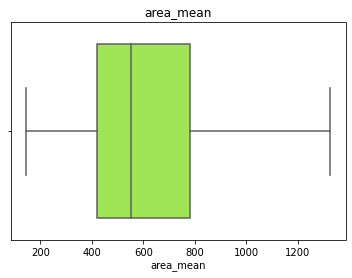

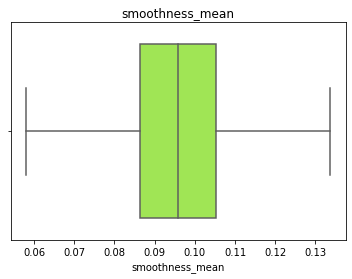

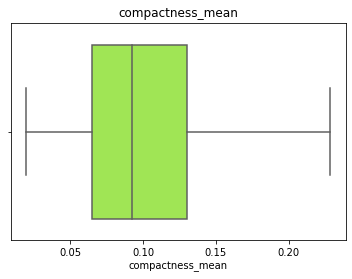

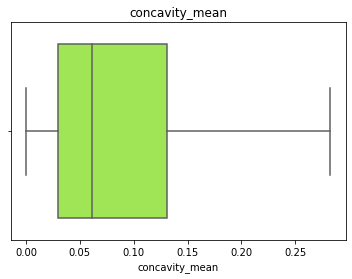

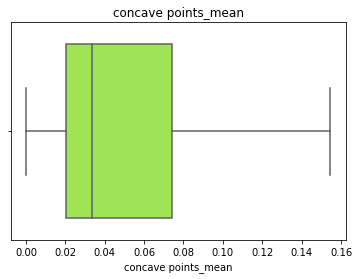

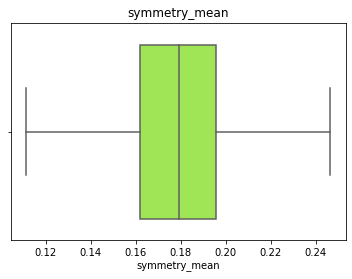

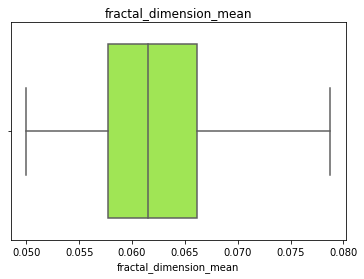

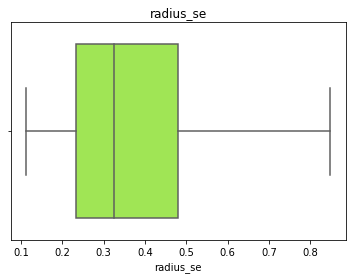

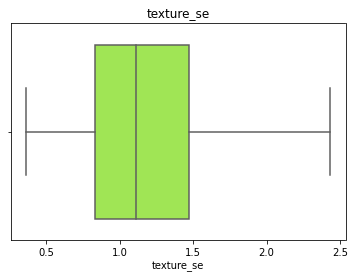

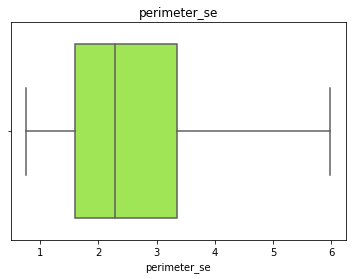

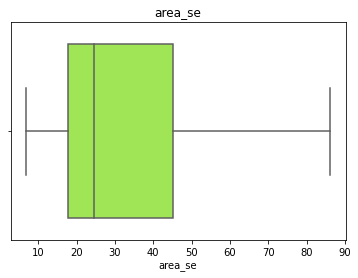

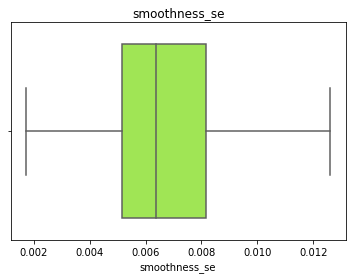

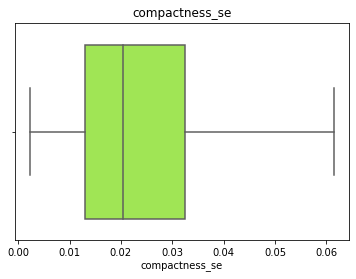

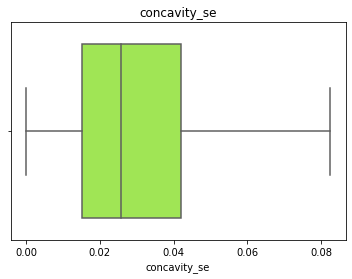

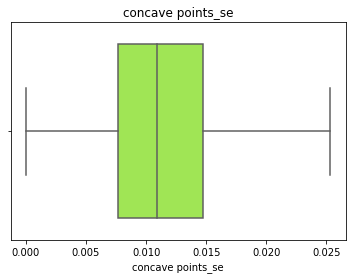

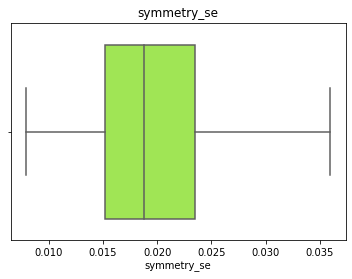

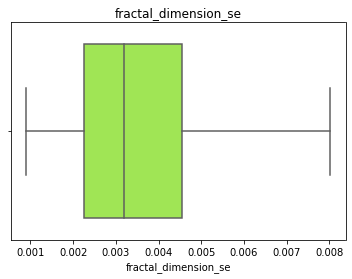

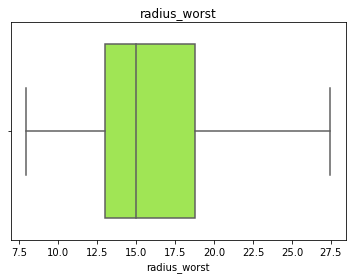

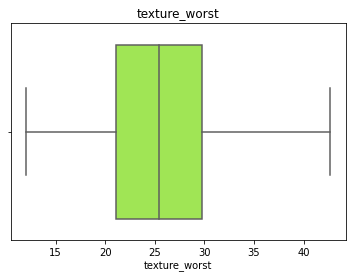

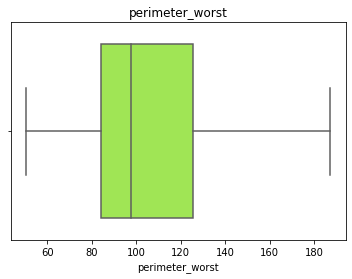

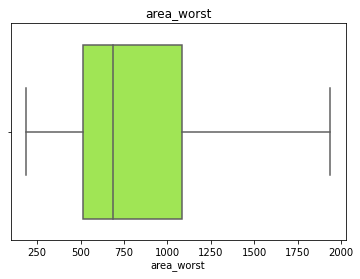

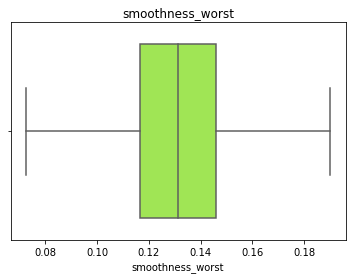

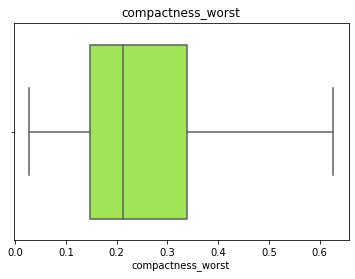

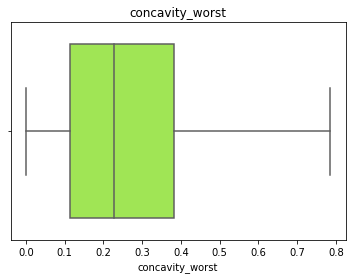

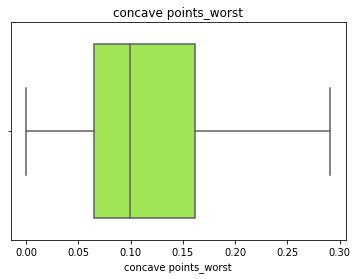

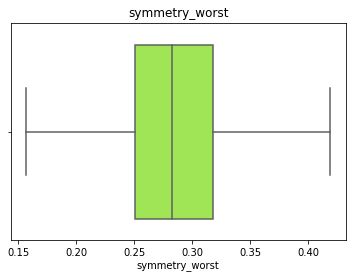

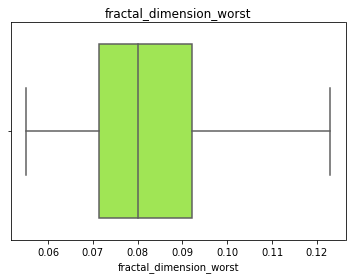

In [146]:
#Boxplot to see the outliers.
for col in num_features:
    data=df.copy()
    sns.boxplot(df[col],palette='turbo_r')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

#### We have now removed all the outliers present in our dataset.


radius_mean


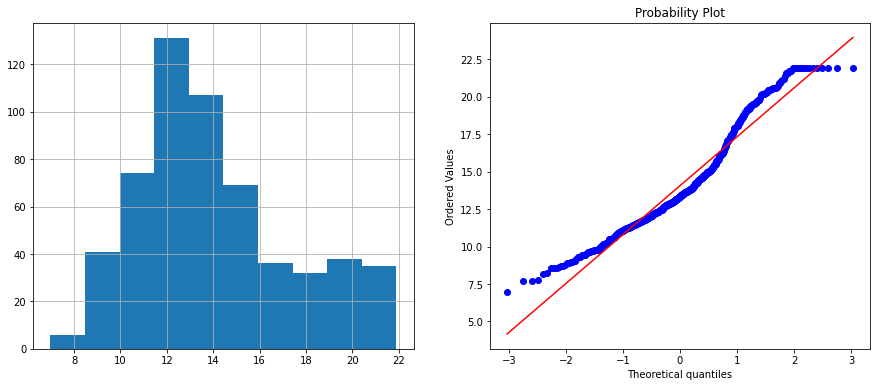

texture_mean


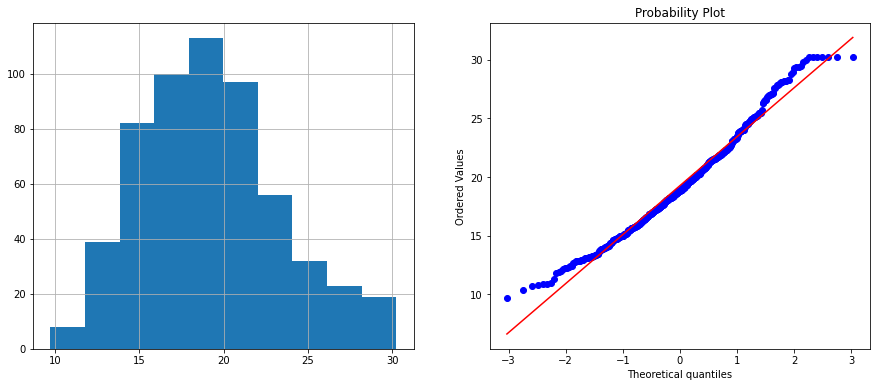

perimeter_mean


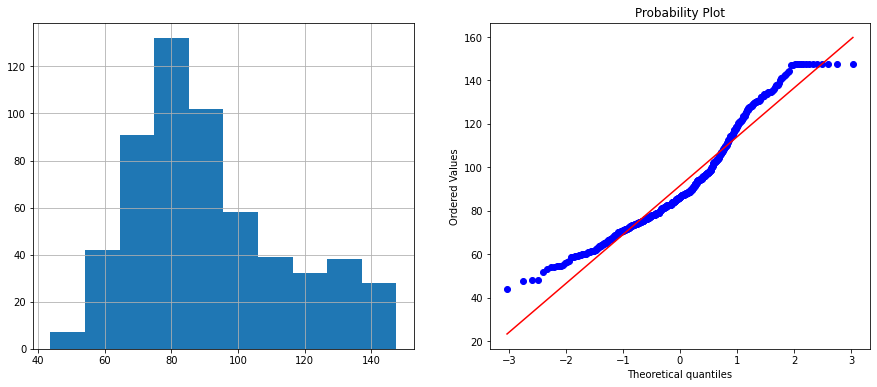

area_mean


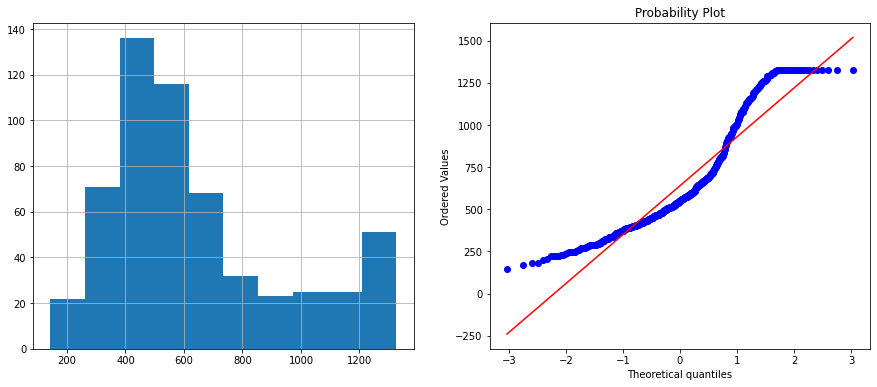

smoothness_mean


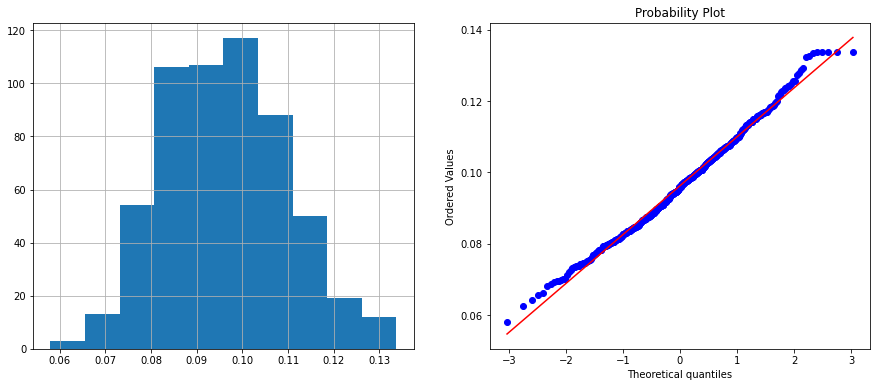

compactness_mean


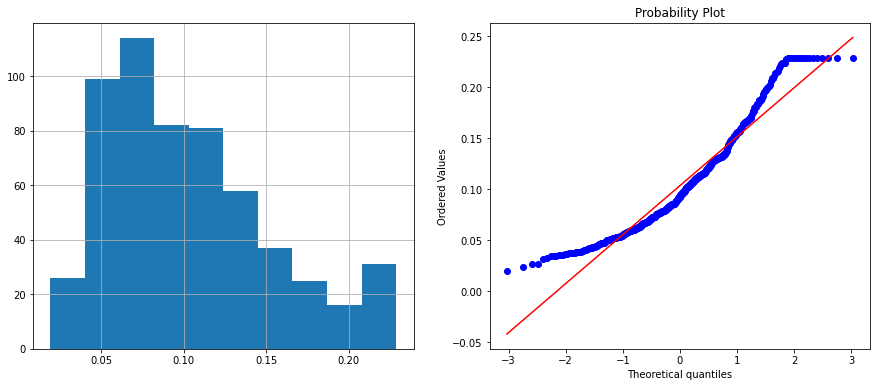

concavity_mean


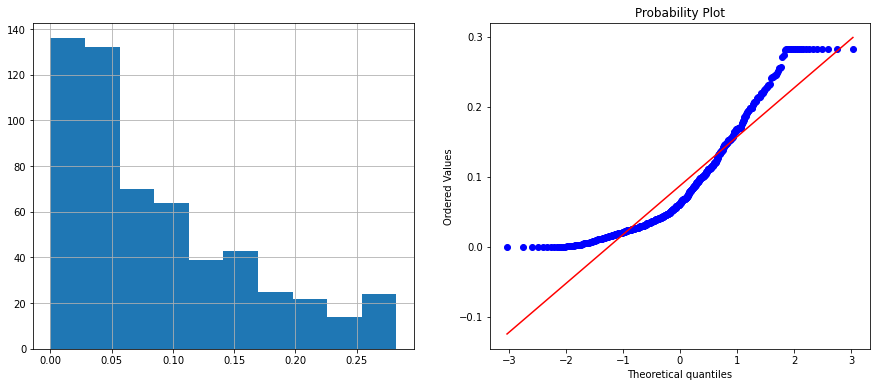

concave points_mean


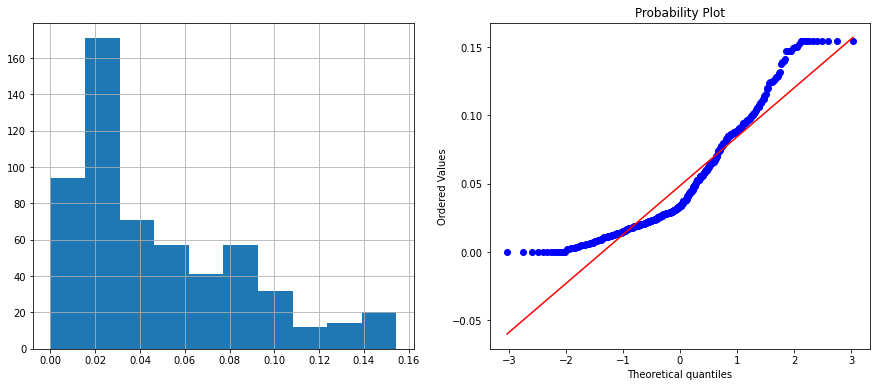

symmetry_mean


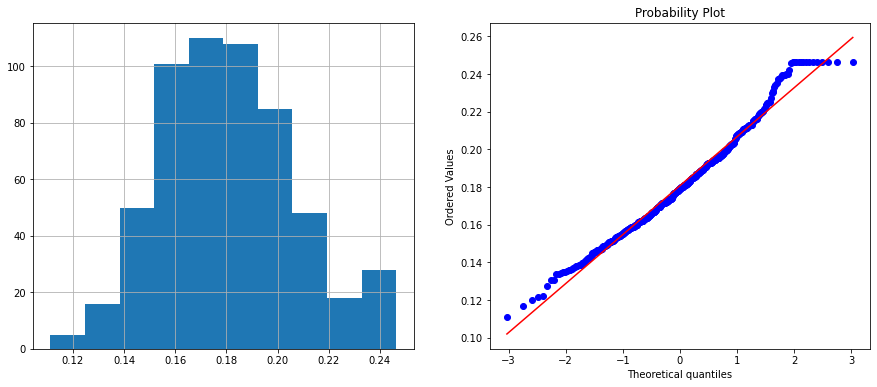

fractal_dimension_mean


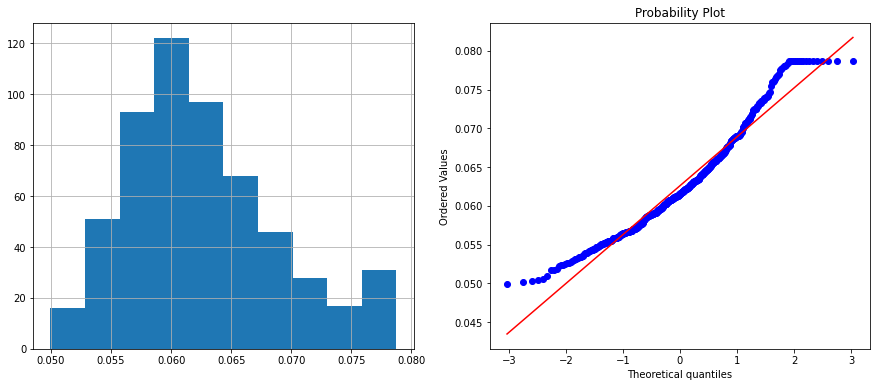

radius_se


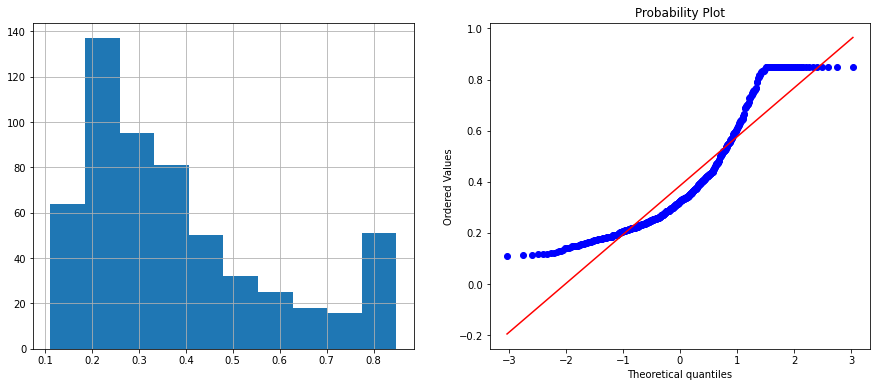

texture_se


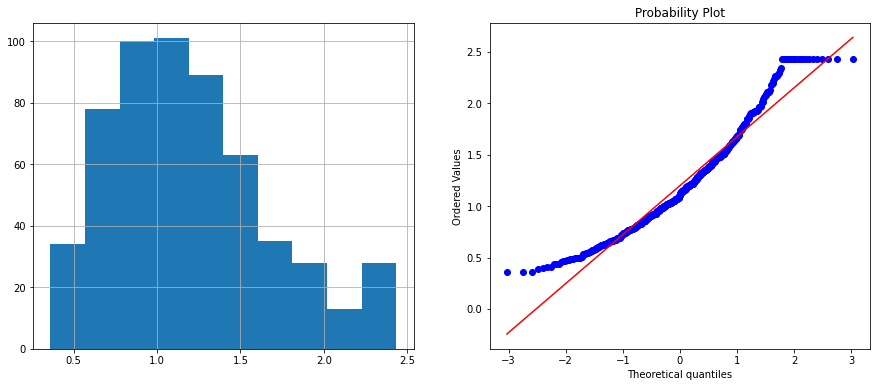

perimeter_se


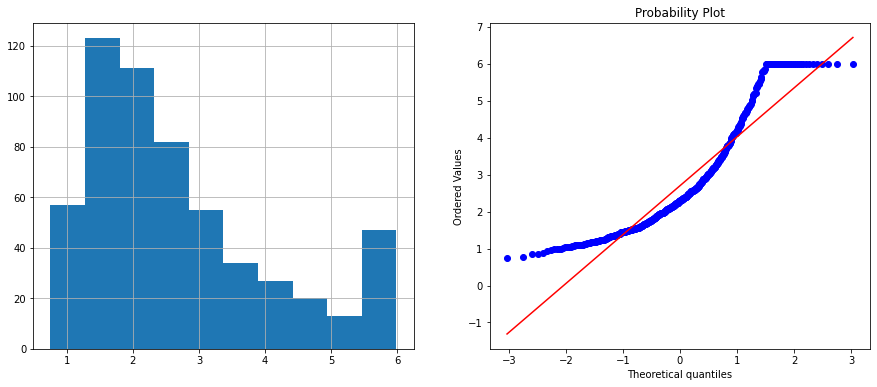

area_se


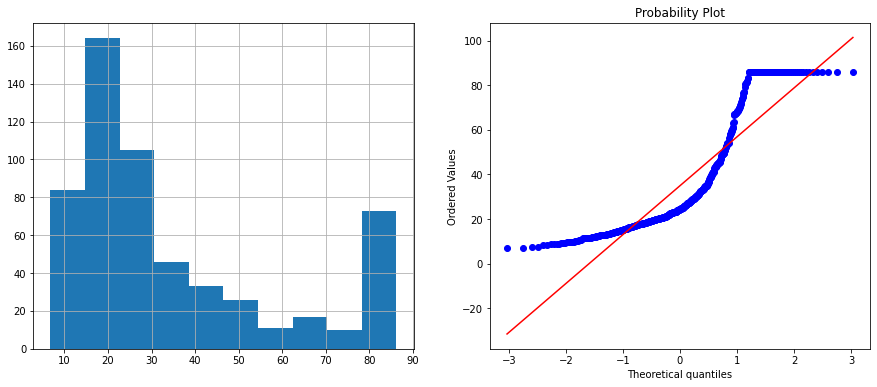

smoothness_se


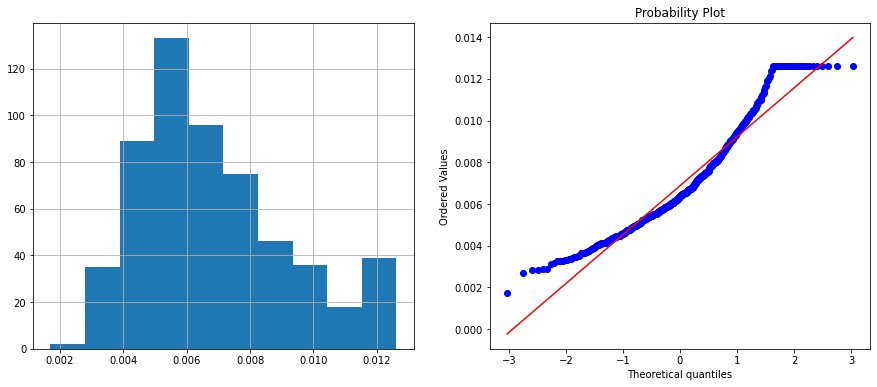

compactness_se


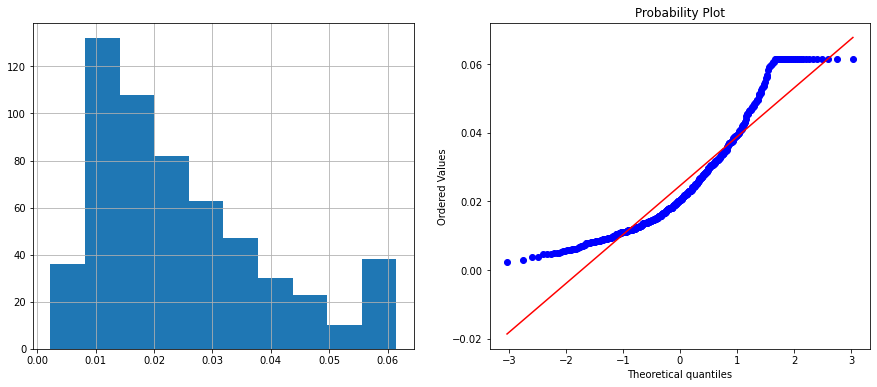

concavity_se


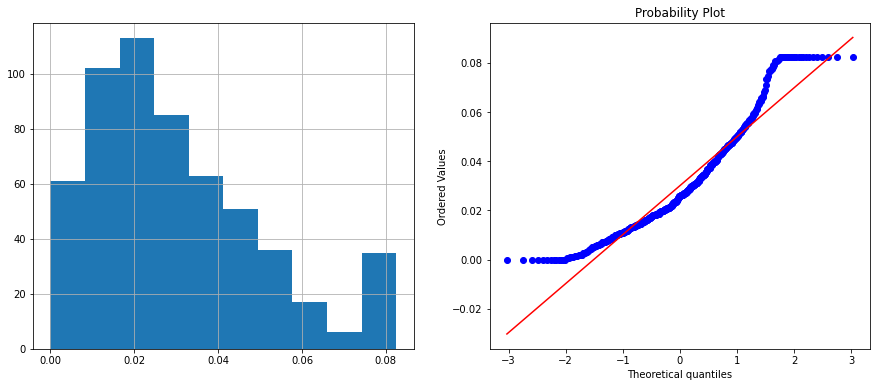

concave points_se


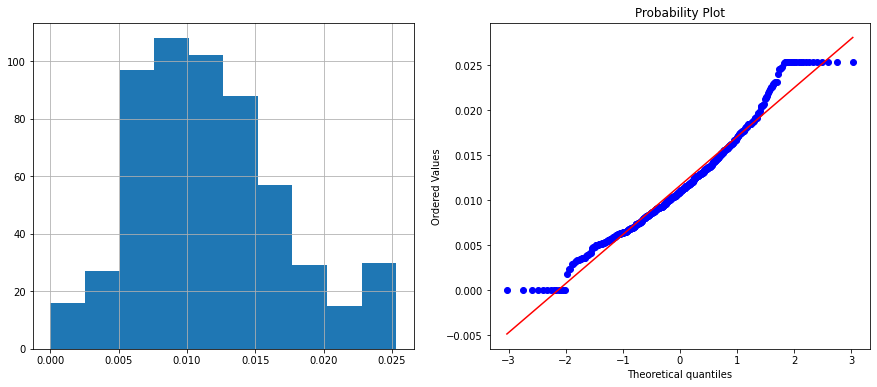

symmetry_se


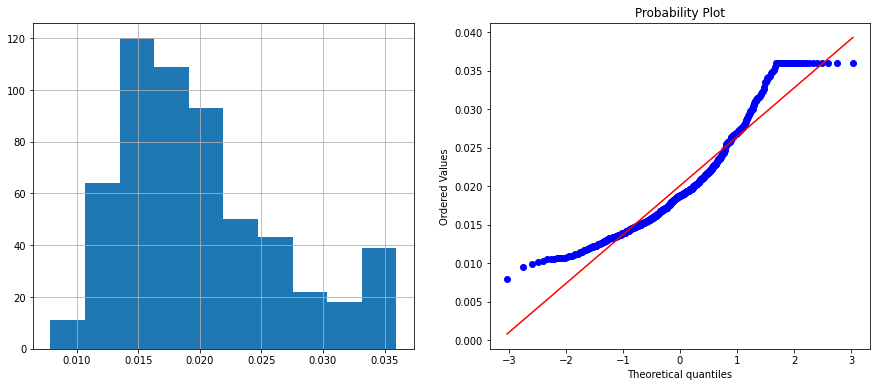

fractal_dimension_se


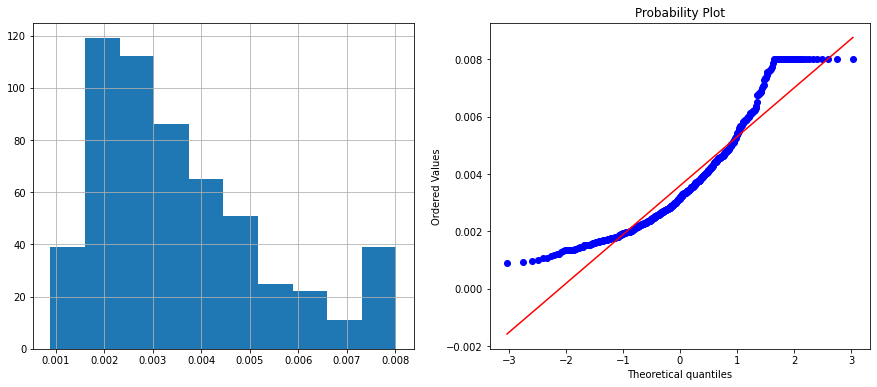

radius_worst


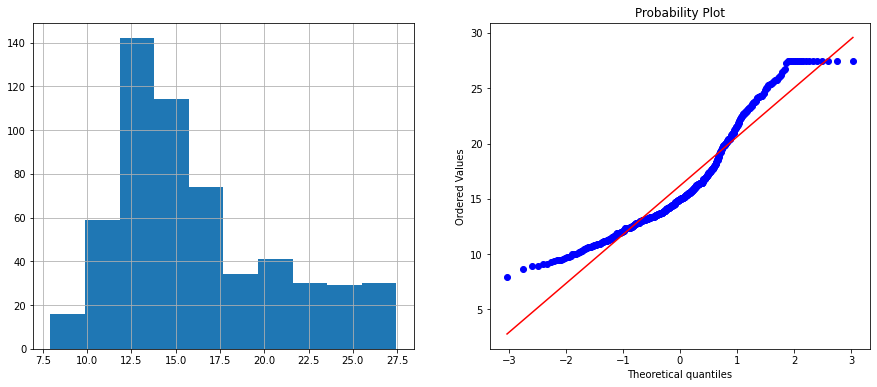

texture_worst


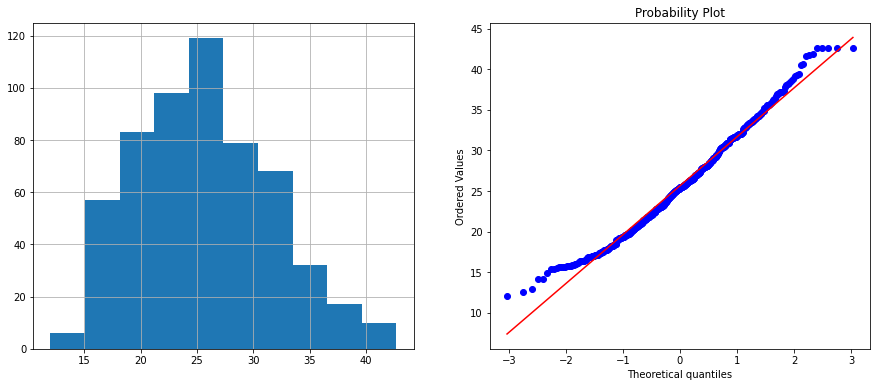

perimeter_worst


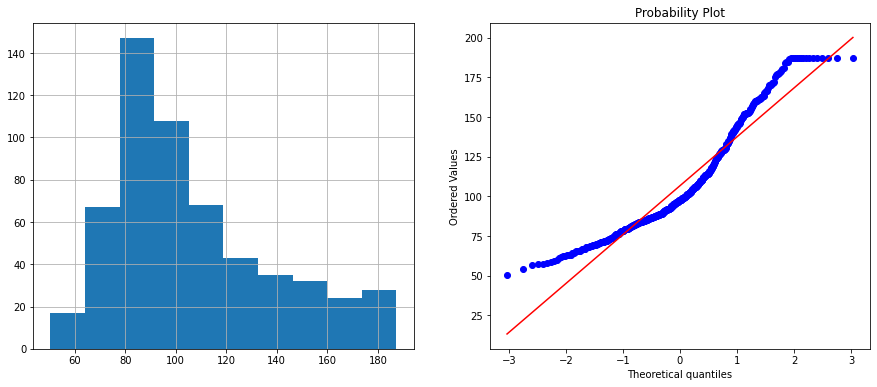

area_worst


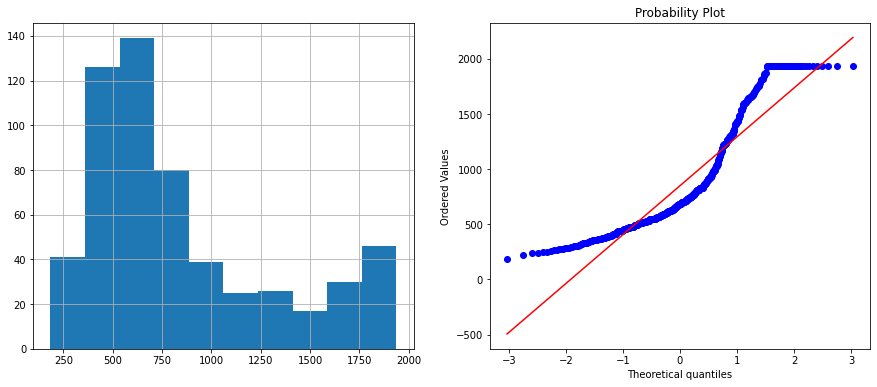

smoothness_worst


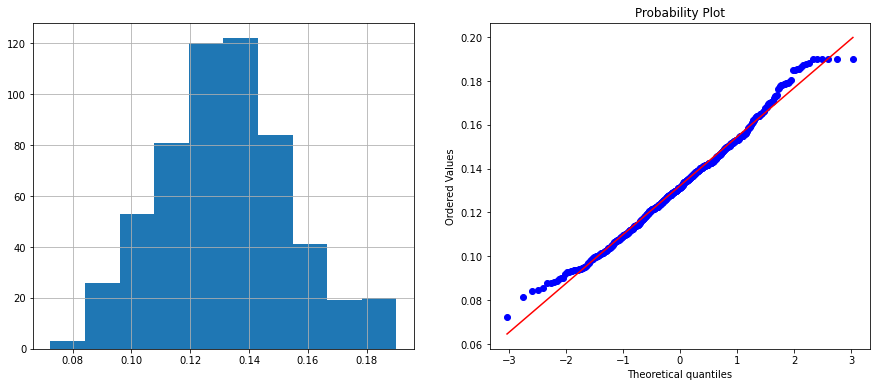

compactness_worst


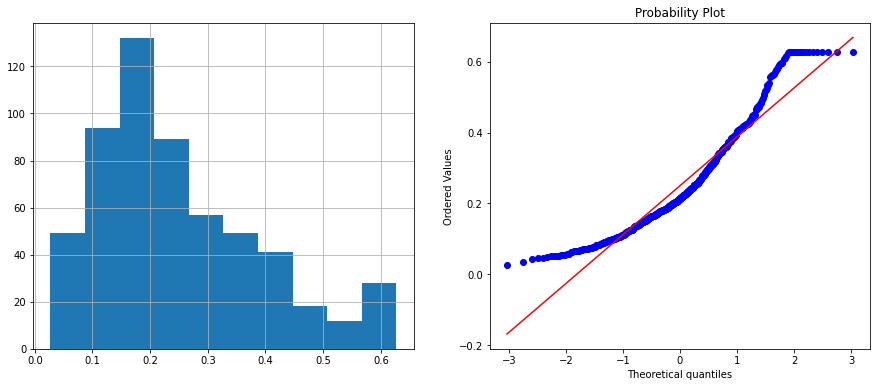

concavity_worst


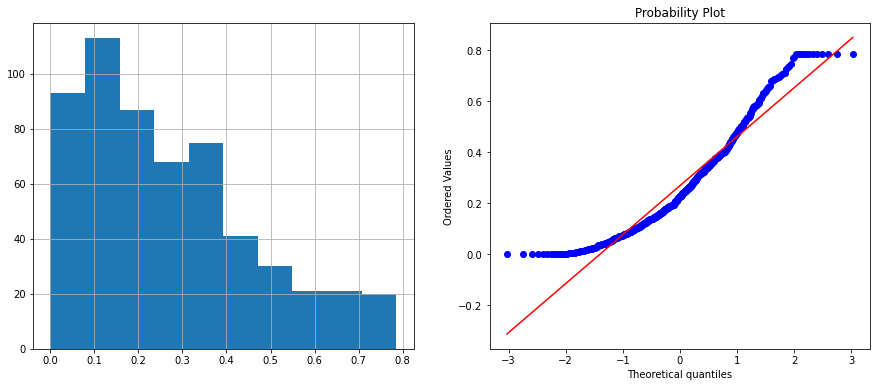

concave points_worst


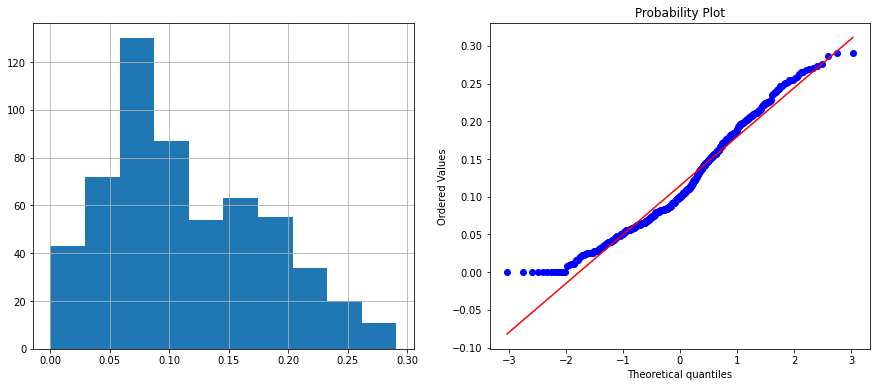

symmetry_worst


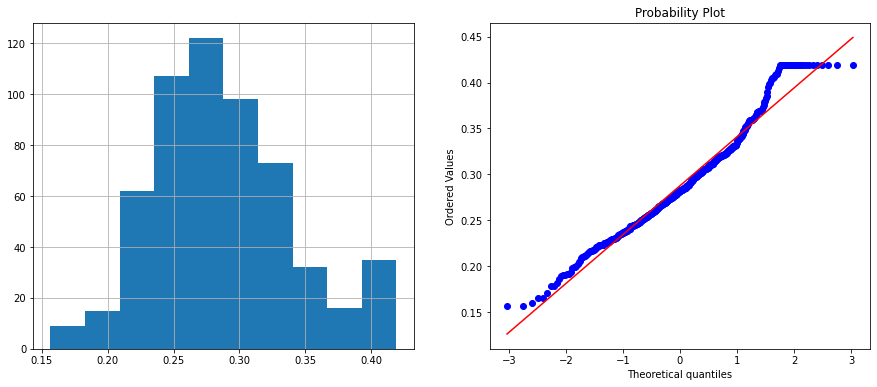

fractal_dimension_worst


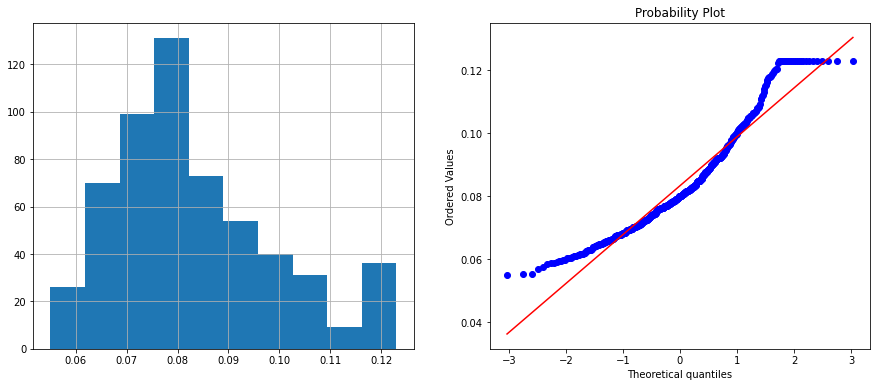

In [147]:
for feature in num_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

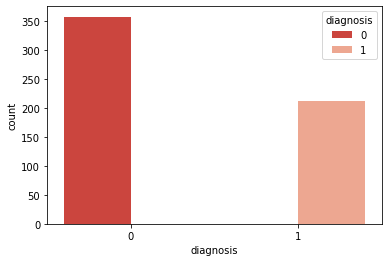

In [148]:
#Countplot 

sns.countplot(df['diagnosis'],palette='Reds_r',hue=df['diagnosis'])

# 0 means----> benign
# 1 mean-----> Malign

In [149]:
columns=['perimeter_worst','area_worst','concave points_worst','concave points_mean','radius_worst','concavity_mean','area_se','perimeter_mean','concavity_worst','radius_mean']

In [150]:
df[columns].head()

,perimeter_worst,area_worst,concave points_worst,concave points_mean,radius_worst,concavity_mean,area_se,perimeter_mean,concavity_worst,radius_mean
0,184.60,1937.05,0.2654,0.14710,25.38,0.28241,86.20,122.80,0.7119,17.99
1,158.80,1937.05,0.1860,0.07017,24.99,0.08690,74.08,132.90,0.2416,20.57
2,152.50,1709.00,0.2430,0.12790,23.57,0.19740,86.20,130.00,0.4504,19.69
3,98.87,567.70,0.2575,0.10520,14.91,0.24140,27.23,77.58,0.6869,11.42
4,152.20,1575.00,0.1625,0.10430,22.54,0.19800,86.20,135.10,0.4000,20.29


In [151]:
X=df[columns]
y=df['diagnosis']

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=433)

#### Lets now Standardize our dataset.


In [153]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale_X_train=scale.fit_transform(X_train)
scale_X_test=scale.transform(X_test)

#### Let's first try to look for the feature Importance in our dataset.

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

In [155]:
etc.feature_importances_

array([0.12845151, 0.1377486 , 0.11110912, 0.11423643, 0.13628645,
       0.08285527, 0.08300671, 0.08774345, 0.06542459, 0.05313789])

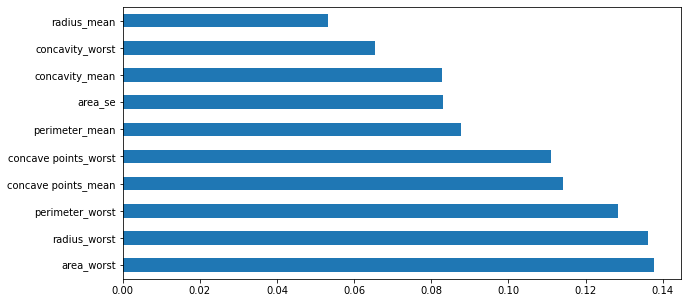

In [156]:
plt.figure(figsize=(10,5))
feature_important=pd.Series(etc.feature_importances_,index=X.columns)
feature_important.nlargest(10).plot(kind='barh')
plt.show()

In [157]:
feature_important.nlargest(10)

area_worst              0.137749
radius_worst            0.136286
perimeter_worst         0.128452
concave points_mean     0.114236
concave points_worst    0.111109
perimeter_mean          0.087743
area_se                 0.083007
concavity_mean          0.082855
concavity_worst         0.065425
radius_mean             0.053138
dtype: float64

### Above barplot shows the top 10 feature which are important for the prediction or has significant impact on our dependent variable.

## Model Building.

### XGBOOST CLASSIFIER.

In [34]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
model=xgb.fit(scale_X_train,Y_train)

[12:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
prediction=xgb.predict(scale_X_test)

In [36]:
train_score=xgb.score(scale_X_train,Y_train)
train_score

1.0

In [37]:
test_score=xgb.score(scale_X_test,Y_test)
test_score

0.935672514619883

In [38]:
#Lets check our performance matrics.
from sklearn.metrics import accuracy_score,f1_score,classification_report

print("Accuracy score is {}".format(np.round(accuracy_score(Y_test,prediction)*100),2))

Accuracy score is 94.0


### Logistic Regression.

In [158]:

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
model_1=logreg.fit(scale_X_train,Y_train)

In [159]:
prediction_1=logreg.predict(scale_X_test)

In [160]:
train_score=logreg.score(scale_X_train,Y_train)
train_score

0.9547738693467337

In [161]:
test_score=logreg.score(scale_X_test,Y_test)
test_score

0.9415204678362573

In [162]:

print("Accuracy score is {}".format(np.round(accuracy_score(Y_test,prediction_1)*100),2))

Accuracy score is 94.0


### Random Forest.

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_2=rfc.fit(scale_X_train,Y_train)

In [49]:
prediction_2=rfc.predict(scale_X_test)

In [50]:
train_score=rfc.score(scale_X_train,Y_train)
train_score

1.0

In [51]:
test_score=rfc.score(scale_X_test,Y_test)
test_score

0.9473684210526315

In [52]:

print("Accuracy score is {}".format(np.round(accuracy_score(Y_test,prediction_2)*100),2))

Accuracy score is 95.0


In [53]:
#Lets try with cross-validation

from sklearn.model_selection import cross_val_score

xgb_cv=cross_val_score(xgb,X,y,cv=10,scoring='accuracy')
rfc_cv=cross_val_score(rfc,X,y,cv=10,scoring='accuracy')
logreg_cv=cross_val_score(logreg,X,y,cv=10,scoring='accuracy')


[12:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [54]:
#Lets check the the model with best accuracy after using cross_val_score

print(" XGBClassifier gave the accuracy of --->",np.round(xgb_cv.mean()*100,2),"%",'\n')
print(" Logistic Regression gave the accuracy of --->",np.round(logreg_cv.mean()*100,2),'%','\n')
print(' Random Forest Classifier gave the accuracy of --->"',np.round(rfc_cv.mean()*100,2),'%')


 XGBClassifier gave the accuracy of ---> 94.03 % 

 Logistic Regression gave the accuracy of ---> 94.73 % 

 Random Forest Classifier gave the accuracy of --->" 94.38 %


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Conlusion we can see that  our Logistic Regression  has given the best accuracy among others with accuracy of 94.73% (using cross_val_score).

In [163]:
#NOW let's save the model& pickle the file using joblib module.

import joblib


In [56]:
joblib.dump(logreg,'logregCancerprediction.pkl')

['logregCancerprediction.pkl']

In [164]:
model_load=joblib.load('logregCancerprediction.pkl')

In [165]:
model_load.predict(scale_X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [167]:
temp={}


temp['concave points_mean']=1
temp['area_worst']=2
temp['concave points_worst']=10
temp['radius_worst']=0
temp['perimeter_worst']=0
temp['area_se']=0
temp['radius_mean']=0.32
temp['perimeter_mean']=0
temp['concavity_worst']=0
temp['concavity_mean']=0


In [168]:
test_data=pd.DataFrame({'x':temp}).transpose()

In [169]:
test_data

,area_se,area_worst,concave points_mean,concave points_worst,concavity_mean,concavity_worst,perimeter_mean,perimeter_worst,radius_mean,radius_worst
x,0.0,2.0,1.0,10.0,0.0,0.0,0.0,0.0,0.32,0.0


In [170]:
model_load.predict(test_data)[0]

1

### So pickling of model is done with joblib's dump() method.

## OUR MODEL IS READY FOR DEPLOYMENT.